## 상관분석

### 상관분석
- 두 변수 간의 선형적 관계를 상관 계수로 표현하는 것
- 상관분석 방법
    - 시각화로 확인 (산포도 또는 heatmap 사용)
    - 피어슨 상관계수 사용
    - 스피어만 상관계수 사용
    - 상관행렬 사용
- 다중공선성 문제   

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# 한글 문제
# matplotlib의 기본 폰트에서 한글이 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [6]:
df = pd.read_csv("./data/일별_금은달러.csv")
df.head(3)
df.tail(3)

,일자,금값,은값,달러 환율
0,2020.08.07,78538.90,27.53,1188.5
1,2020.08.06,78009.22,28.39,1185.5
2,2020.08.05,77748.00,26.88,1188.0


,일자,금값,은값,달러 환율
25,2020.07.02,68278.07,18.24,1199.0
26,2020.07.01,68941.28,18.13,1203.5
27,2020.06.30,68559.78,18.54,1203.0


In [7]:
# 정렬
df.sort_values(by='일자', inplace=True)
df.head(2)

,일자,금값,은값,달러 환율
27,2020.06.30,68559.78,18.54,1203.0
26,2020.07.01,68941.28,18.13,1203.5


([<matplotlib.axis.XTick at 0x198734a7810>,
 [Text(0.0, 0, '2020.06.30'),
  Text(8.0, 0, '2020.07.13'),
  Text(16.0, 0, '2020.07.23'),
  Text(24.0, 0, '2020.08.04')])

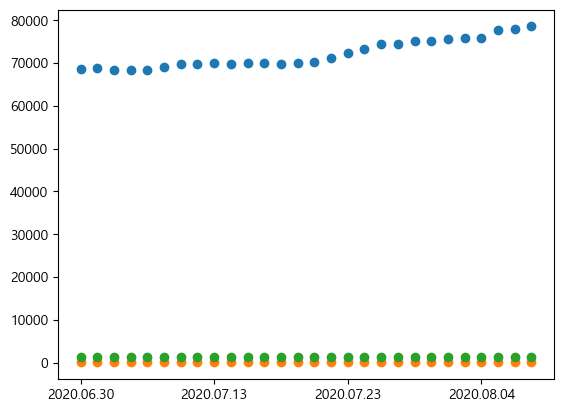

In [8]:
# 시각화로 확인 : 산포도로 확인
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

plt.scatter(df['일자'], df['금값'])
plt.scatter(df['일자'], df['은값'])
plt.scatter(df['일자'], df['달러 환율'])
plt.xticks(df['일자'].iloc[::8])

array([[<Axes: xlabel='금값', ylabel='금값'>,
        <Axes: xlabel='은값', ylabel='금값'>,
        <Axes: xlabel='달러 환율', ylabel='금값'>],
       [<Axes: xlabel='금값', ylabel='은값'>,
        <Axes: xlabel='은값', ylabel='은값'>,
        <Axes: xlabel='달러 환율', ylabel='은값'>],
       [<Axes: xlabel='금값', ylabel='달러 환율'>,
        <Axes: xlabel='은값', ylabel='달러 환율'>,
        <Axes: xlabel='달러 환율', ylabel='달러 환율'>]], dtype=object)

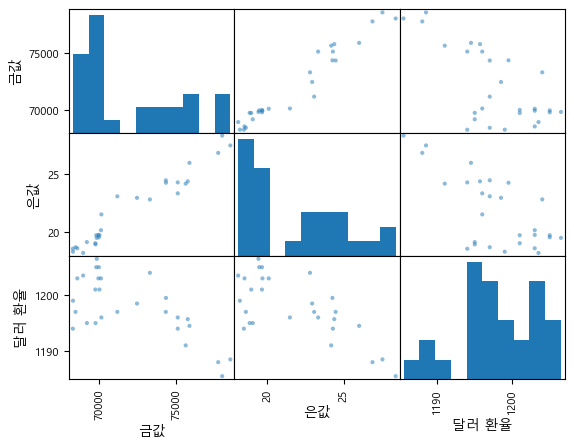

In [9]:
pd.plotting.scatter_matrix(df.drop('일자', axis = 1))

In [10]:
# 피어슨 상관계수 
from scipy.stats import *
pearsonr(df['금값'], df['은값'])
pearsonr(df['금값'], df['달러 환율'])
pearsonr(df['은값'], df['달러 환율'])

# 결과 (상관계수, p-value)
# p-value : 상관관계가 얼마나 유의미한지 나타냄


# df['금값'], df['은값']
# 상관계수 : statistic=0.97186 : 매우 강한 양의 상관관계 
# p-value : pvalue=7.033325258452306e-05 < 0.05 이므로 유의미한 상관이 있다고 간주

# df['금값'], df['달러 환율']
# 상관계수 : statistic=-0.6793266264341936 : 보통의 음의 상관관계 
# p-value : pvalue=7.033325258452306e-05 < 0.05 이므로 유의미한 상관이 있다고 간주

# df['은값'], df['달러 환율']
# 상관계수 : statistic=-0.6954569556203559 : 보통의 음의 상관관계 (약간 강이라고도 간주 할 수 있음)
# p-value : pvalue=7.033325258452306e-05 < 0.05 이므로 유의미한 상관이 있다고 간주

PearsonRResult(statistic=0.9718640116033497, pvalue=7.508878356556942e-18)

PearsonRResult(statistic=-0.6793266264341936, pvalue=7.033325258452306e-05)

PearsonRResult(statistic=-0.6954569556203559, pvalue=3.989042061957992e-05)

In [11]:
# 스피어만 상관계수

spearmanr(df['금값'], df['은값'])
spearmanr(df['금값'], df['달러 환율'])
spearmanr(df['은값'], df['달러 환율'])

# 결과 동일

SignificanceResult(statistic=0.9711235892228813, pvalue=1.0481280432981455e-17)

SignificanceResult(statistic=-0.5039075855936102, pvalue=0.006257468267109452)

SignificanceResult(statistic=-0.528106006718531, pvalue=0.003869997604824081)

In [12]:
# 상관행렬 : pearson
df.drop('일자', axis = 1).corr(method = 'pearson')

,금값,은값,달러 환율
금값,1.000000,0.971864,-0.679327
은값,0.971864,1.000000,-0.695457
달러 환율,-0.679327,-0.695457,1.000000


In [13]:
# 상관행렬 : spearman
df.drop('일자', axis = 1).corr(method = 'spearman') 

,금값,은값,달러 환율
금값,1.000000,0.971124,-0.503908
은값,0.971124,1.000000,-0.528106
달러 환율,-0.503908,-0.528106,1.000000


In [ ]:
#####################################################################################

### 다중공선성 (Multicollinearity)
- 독립변수간 상관관계를 보이는 것 
- 회귀분석에서 다중공선성 존재 시 부정확한 회귀 결과 도출 가능성 높음 
- 다중공선성 확인 방법
    - (1) 시각화 : 산점도나 Heatmap 사용
    - (2) VIF(Variance Inflation Factors : 분산팽창요인) 사용
        - 보통 VIF가 10이 넘으면 다중공선성이 존재한다고 판단
- 다중공선성 해결 방법
    - (1) 정규화(표준화)  
    - (2) 상관관계가 높은 변수 삭제 
    - (3) PCA(Principal Component Analysis : 주성분분석) 방법

In [ ]:
# 보스턴 주택 데이터셋 사용 

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

boston_df = df_pop = pd.read_csv('./data/boston_dataset.csv', index_col=0) 
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
x = boston_df.iloc[:, :-1]
y = boston_df['PRICE']

### (1) 시각화 : 산점도나 Heatmap 사용

<Figure size 1000x600 with 0 Axes>

<Axes: >

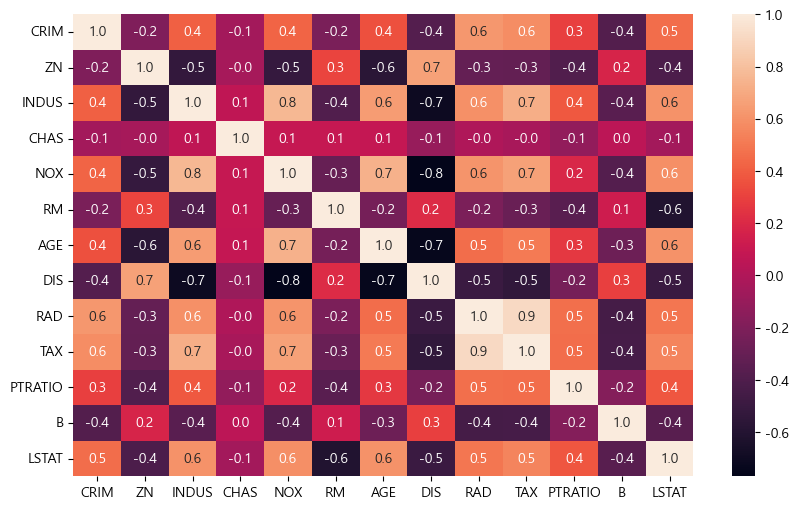

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(x.corr(), annot=True, fmt='3.1f')
plt.show()

### (2) VIF(Variance Inflation Factors : 분산팽창요인) 사용
- 보통 VIF가 10이 넘으면 다중공선성이 존재한다고 판단

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
vif_df['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif_df['features'] = x.columns
vif_df = vif_df.sort_values("vif").reset_index(drop=True) # 다시 0부터 
vif_df

# CHAS, CRIM, ZN 3개만 제외한 모든 피처의 VIF가 10이 넘음 

,vif,features
0,1.152952,CHAS
1,2.100373,CRIM
2,2.844013,ZN
3,11.102025,LSTAT
4,14.485758,INDUS
5,14.699652,DIS
6,15.167725,RAD
7,20.104943,B
8,21.386850,AGE
9,61.227274,TAX


### 다중공선성 해결 방법

### (1) 정규화(표준화) 수행 

In [18]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


#표준화(Standard Scaling)

scaler = StandardScaler()
scaler.fit(x)
boston_scaled = scaler.transform(x)

x_sc = pd.DataFrame(data=boston_scaled, columns=x.columns)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df['vif'] = [variance_inflation_factor(x_sc.values, i) for i in range(x_sc.shape[1])]
vif_df['features'] = x_sc.columns
vif_df = vif_df.sort_values("vif").reset_index(drop=True) # 다시 0부터 
vif_df

# 모든 피처의 VIF이 10 보다 작게 나옴
# 다중공선성 문제 해결 

StandardScaler()

,vif,features
0,1.073995,CHAS
1,1.348521,B
2,1.792192,CRIM
3,1.799084,PTRATIO
4,1.933744,RM
5,2.298758,ZN
6,2.941491,LSTAT
7,3.100826,AGE
8,3.955945,DIS
9,3.991596,INDUS


### (2) 상관관계가 높은 변수 삭제

In [ ]:
# 피처 선택 : VIF가 높은 피처 삭제하면 더 값을 줄일 수 있음
# 피처 선택법 등을 사용하거나 직접 선택해서 삭제 가능

In [19]:
del x_sc['RAD']
del x_sc['TAX']
# VIF가 높은 피처 2개만 삭제하고 결과 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df['vif'] = [variance_inflation_factor(x_sc.values, i) for i in range(x_sc.shape[1])]
vif_df['features'] = x_sc.columns
vif_df = vif_df.sort_values("vif").reset_index(drop=True) # 다시 0부터 
vif_df

# VIF 수치가 적어짐 

,vif,features
0,1.057805,CHAS
1,1.316559,B
2,1.478206,CRIM
3,1.496077,PTRATIO
4,1.872532,RM
5,2.154483,ZN
6,2.936487,LSTAT
7,3.075755,AGE
8,3.179166,INDUS
9,3.901348,NOX


### (3) PCA(Principal Component Analysis : 주성분분석) 방법
- PCA는 지난 노트 참고할 것 